In [ ]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train_new = x_train.reshape((ndata_train,28,28,1))
x_test_new = x_test.reshape((ndata_test,28,28,1))
xshape = x_train_new.shape[1:4]

In [ ]:
xshape

(28, 28, 1)

The base of the model consists of 4 convolutional layers accompanied with 2 fully connected layers. The convolutional layers were placed in sets of 2 and are used in tandem with MaxPooling and Dropout. We had originally neglected to use dropout, however, we noticed overfitting after 12 epochs. Dropout seemed like the natural choice to prevent overfitting. The first two convolutional layers have 32 filters,and the last two have 64. The number ascends because as the CNN progresses, there are more combinations of patterns to capture, hence the need for more filters. (source: https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo#:~:text=The%20higher%20the%20number%20of,especially%20true%20for%20image%20data) The other "semi-unique" thing we added was the regularization stage in the convolutional layers. This was our original pre-measure to overfitting, as penalizing the loss function causes the weights to be slightly smaller, preventing the exploding gradient problem. The fully connected layers are of course preceded by a flattening layer. Our output layer consisted of 10 potential categories (0-9) in the MNIST dataset, and the activation used was softmax, standard for giving probabilities for each class label. 

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=xshape, filters = 32, kernel_size = (3,3), activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.0005))),
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, activation="relu")),
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.0005))),
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = 1, activation = "relu")),
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Flatten()),
model.add(tf.keras.layers.Dense(units = 256, activation="relu")),
model.add(tf.keras.layers.Dense(units = 128, activation="relu")),
model.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [ ]:
model.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=256)

Epoch 1/12
188/188 [==============================] - 12s 16ms/step - loss: 0.3489 - accuracy: 0.8982 - val_loss: 0.0978 - val_accuracy: 0.9775
Epoch 2/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0977 - accuracy: 0.9751 - val_loss: 0.0674 - val_accuracy: 0.9852
Epoch 3/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0665 - accuracy: 0.9836 - val_loss: 0.0690 - val_accuracy: 0.9847
Epoch 4/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0562 - accuracy: 0.9866 - val_loss: 0.0541 - val_accuracy: 0.9886
Epoch 5/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0443 - accuracy: 0.9892 - val_loss: 0.0487 - val_accuracy: 0.9889
Epoch 6/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0384 - accuracy: 0.9909 - val_loss: 0.0543 - val_accuracy: 0.9867
Epoch 7/12
188/188 [==============================] - 3s 14ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0372 - val_accuracy: 0.990

In [ ]:
print('This model predicts '+str(model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9917
This model predicts 99.16999936103821% of the test data correctly


In [ ]:
from keras.models import load_model
model.save("mnistmodel.h5")
loaded_model = load_model("mnistmodel.h5")
# loss, accuracy = loaded_model.evaluate(test_data, test_targets)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# COLAB
from google.colab import files
uploaded = files.upload()

with open('sample_data.csv', 'r', encoding='utf-8-sig') as f: 
    input_arr = np.genfromtxt(f, dtype=float, delimiter=',') # trying to solve BOM issue (Byte Order Mark)

Saving sample_data.csv to sample_data.csv


In [ ]:
# JUPYTER
# with open('sample_data.csv', 'r', encoding='utf-8-sig') as f: 
#     input_arr = np.genfromtxt(f, dtype=float, delimiter=',')

In [ ]:
tensor1 = np.reshape(input_arr, (1, 28, 28, 1))

In [ ]:
prediction = loaded_model.predict(tensor1, verbose=0)
score = prediction
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format([np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to [8] with a 100.00 percent confidence.


In [35]:
prediction_labels = []
prediction = loaded_model.predict(x_test_new, verbose=0)
print(len(prediction))

for i in range(len(prediction)):
  score = tf.nn.softmax(prediction[i])
  best_label = [np.argmax(score)]
  prediction_labels.append(best_label)

10000


In [36]:
pred = np.array(prediction_labels).T
misclassified = np.where(y_test != pred)
misclassified[1] # indexes where the images are misclassified

array([ 115,  247,  321,  449,  619,  659,  674,  716,  740,  846,  938,
        947, 1014, 1039, 1112, 1226, 1232, 1242, 1247, 1260, 1319, 1522,
       1527, 1570, 1621, 1878, 1901, 1987, 2035, 2130, 2135, 2280, 2293,
       2447, 2454, 2488, 2597, 2654, 2771, 2896, 2927, 2939, 2953, 3225,
       3422, 3457, 3520, 3559, 3601, 3727, 3859, 4027, 4176, 4248, 4477,
       4504, 4536, 4740, 4860, 5827, 5937, 5997, 6166, 6172, 6400, 6571,
       6572, 6576, 6597, 6625, 6651, 6783, 7354, 8128, 8325, 8376, 8408,
       8527, 9009, 9642, 9664, 9729, 9839])

In [37]:
misclassified_images_labels = []
flat_list = []
for sublist in prediction_labels:
  for item in sublist:
    flat_list.append(item)
pred2 = np.array(flat_list).T

for i in misclassified[1]:
  false_label = pred2[i]
  true_label = y_test[i]
  true_image = x_test[i]
  misclassified_images_labels.append((true_image, false_label, true_label))

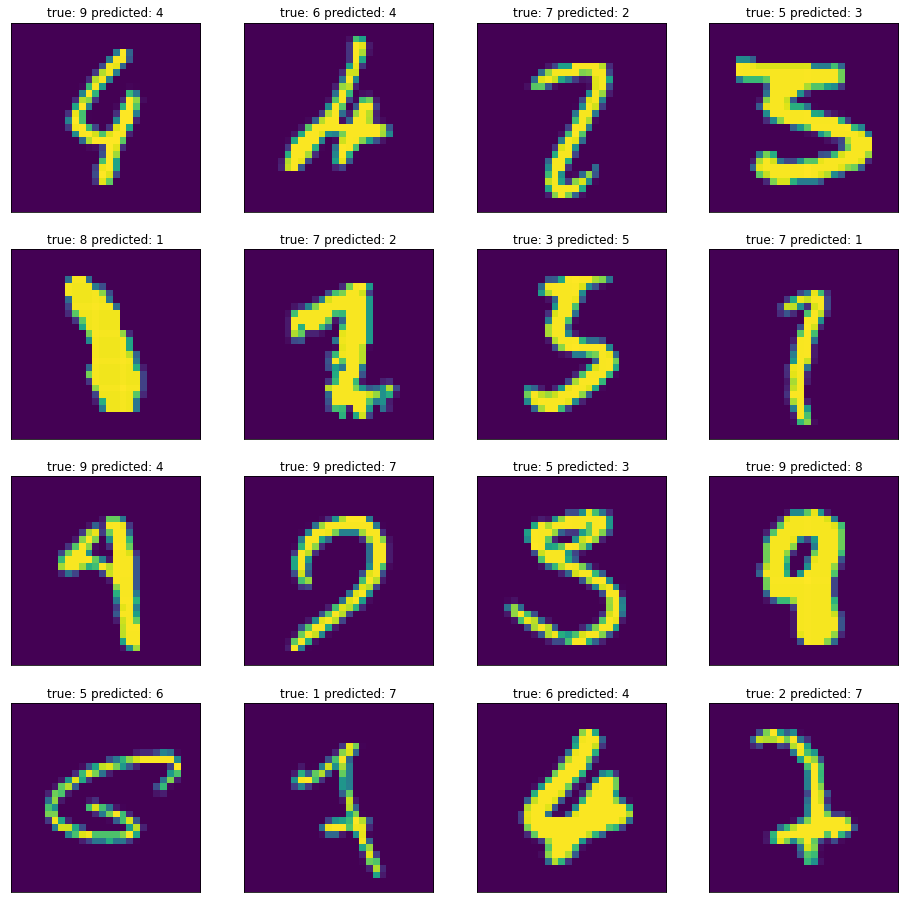

In [38]:
fig = plt.figure(figsize=(16,16))
# plt.title("Misclassified images")
for index in range(len(misclassified_images_labels)):
    ax = fig.add_subplot(4, 4, index + 1, xticks=[], yticks=[])
    image = misclassified_images_labels[index][0]
    label_true = misclassified_images_labels[index][1]
    label_guess = misclassified_images_labels[index][2]
    # bright = avg_brightness(image)
    ax.imshow(image)
    ax.set_title("true: {} predicted: {}".format(label_true, label_guess))
    
    if index==15:
        break

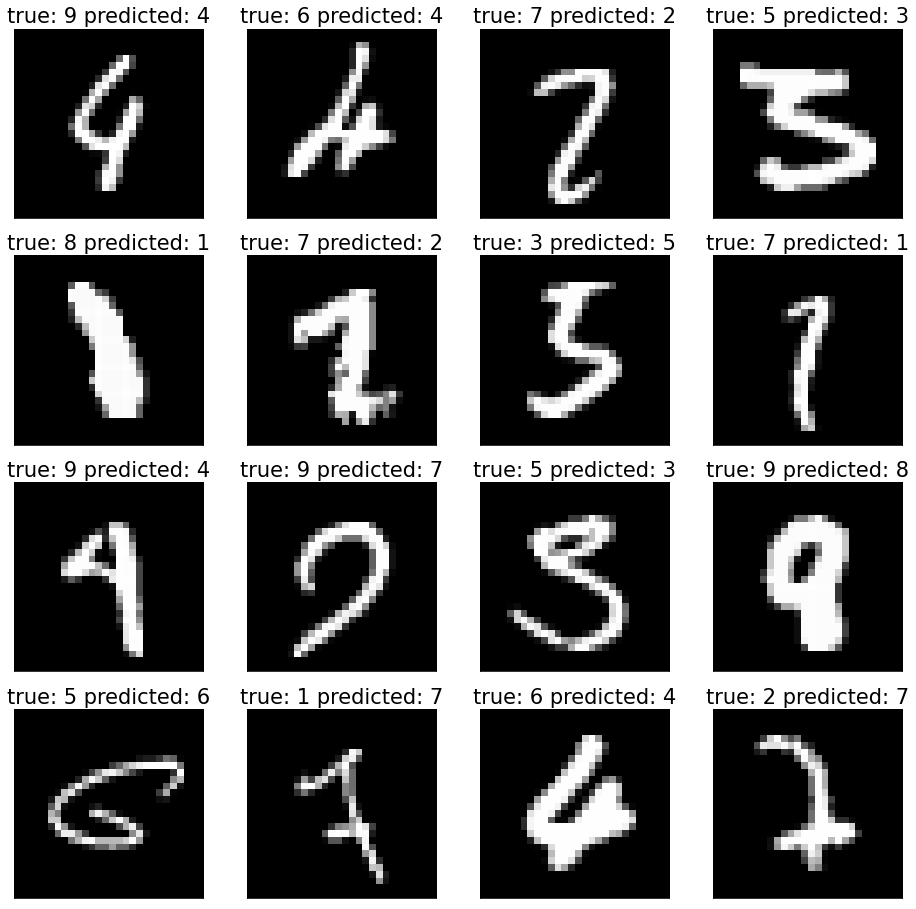

In [39]:
fig = plt.figure(figsize=(16,16))
# plt.title("Misclassified images")
for index in range(len(misclassified_images_labels)):
    ax = fig.add_subplot(4, 4, index + 1, xticks=[], yticks=[], )
    image = misclassified_images_labels[index][0]
    label_true = misclassified_images_labels[index][1]
    label_guess = misclassified_images_labels[index][2]
    # bright = avg_brightness(image)
    ax.set_facecolor('white')
    ax.imshow(image,cmap = 'gray')
    ax.set_title("true: {} predicted: {}".format(label_true, label_guess),color = 'black',size = 21)
    if index==15:
        break
plt.savefig('misclassified_images_final.png', facecolor='black',dpi = 100)


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:

!pip install anvil-uplink
import anvil.server
import anvil.media
anvil.server.connect("QFZVCNPWV6BQLTOTEFDETTUR-C37VHTCCT5HSJTNF")

@anvil.server.callable
def optiIIhw1webscript(user_file):
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from keras.models import load_model
    loaded_model = load_model("mnistmodel.h5")
    import numpy as np
    with anvil.media.TempFile(user_file) as user_file2:
      with open(user_file2, 'r', encoding='utf-8-sig') as f: 
          input_arr = np.genfromtxt(f, dtype=float, delimiter=',') # trying to solve BOM issue (Byte Order Mark)
      tensor1 = np.reshape(input_arr, (1, 28, 28, 1))
      prediction = loaded_model.predict(tensor1, verbose=0)
      score = prediction
      return ("This image most likely belongs to number {} with a {:.2f} percent confidence.".format(np.argmax(score), 100 * np.max(score)))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=1d90bf4d9939c7164fa194eab6c0df87e7295bbd1c96ecff3754118117a995a5
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
